In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('NKE.csv', header=0, parse_dates=[0], index_col=0)

In [3]:
 #2. Đọc file csv và gắng index với giá Close
df1 = df.reset_index()['Close']

In [4]:
df1 = df1.dropna()

In [5]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
#train-test (7-3)

In [7]:
# 4. Chia train test 7-3
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]

In [8]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 \n",
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [9]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
#X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
#X_val = X_val.reshape(X_val.shape[0], time_step, 1)

In [11]:
# Hàm LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

13/13 [==============================] - 7s 183ms/step - loss: 0.1091 - val_loss: 0.0032
Epoch 2/100
13/13 [==============================] - 1s 90ms/step - loss: 0.0186 - val_loss: 0.0147
Epoch 3/100
13/13 [==============================] - 1s 83ms/step - loss: 0.0087 - val_loss: 0.0028
Epoch 4/100
13/13 [==============================] - 1s 87ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 5/100
13/13 [==============================] - 1s 86ms/step - loss: 0.0041 - val_loss: 0.0028
Epoch 6/100
13/13 [==============================] - 1s 90ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 7/100
13/13 [==============================] - 1s 98ms/step - loss: 0.0038 - val_loss: 0.0027
Epoch 8/100
13/13 [==============================] - 1s 97ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 9/100
13/13 [==============================] - 1s 95ms/step - loss: 0.0035 - val_loss: 0.0024
Epoch 10/100
13/13 [==============================] - 1s 80ms/step - loss: 0.0034 - val_loss: 0.00

In [13]:
# 10. Dự báo dữ liệu test, val
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
#y_pred_val=model.predict(X_val)

9/9 [==============================] - 0s 22ms/step


In [14]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
#y_pred_val=scaler.inverse_transform(y_pred_val)

In [15]:
 # 12. Đánh giá độ chính xác thuật toán bằng RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, r2_score, mean_squared_error
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)
# MSE
test_mse = mean_squared_error(y_test, y_pred)
print('Testing MSE:', test_mse)

Testing RMSE: 113.34304969515682
Testing MAPE: 268.6599169881929
Testing MAE: 112.90447695512691
Testing MSE: 12845.008097117376


In [16]:
test_data.shape

(378, 1)

In [17]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [18]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[278:].reshape(1,-1)
x_input.shape
        
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
    
from numpy import array
        
lst_output=[]
n_steps=100
i=0
while(i<30):
            
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        n_steps = min(len(temp_input), 100)
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.40106902]
101
1 day input [0.40876998 0.40301632 0.39482171 0.3908988  0.38139661 0.38122223
 0.36832016 0.36622788 0.34922852 0.33702381 0.31339903 0.30363525
 0.31418358 0.32107052 0.33972626 0.34260309 0.33920322 0.3448697
 0.32708571 0.32586525 0.30625056 0.30398396 0.29631247 0.29204084
 0.29055879 0.29979953 0.29169213 0.2851539  0.27739521 0.27233897
 0.25098072 0.24452968 0.24235027 0.23860169 0.23206346 0.23389416
 0.28611285 0.27687211 0.28149244 0.28846658 0.28759483 0.29910211
 0.29709702 0.30354812 0.31252728 0.31775784 0.32351152 0.34208006
 0.35053617 0.35716153 0.35088489 0.34757214 0.34879261 0.36945343
 0.35515651 0.3244704  0.30668647 0.33998784 0.3484439  0.33196756
 0.36858168 0.38584256 0.38749893 0.40589315 0.40615467 0.38531952
 0.37756084 0.36091012 0.37442248 0.39246799 0.39063729 0.37625317
 0.37939153 0.38139661 0.39333973 0.3908988  0.39368845 0.40057539
 0.41469798 0.41382617 0.44180983 0.45636828 0.45863488 0.4647372
 0.45340424 0.4629937  0.48653129 0

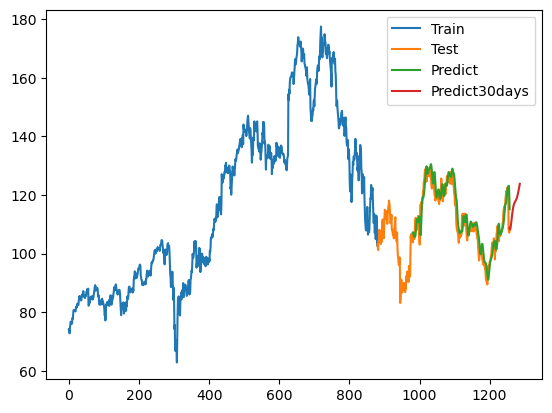

In [19]:
#Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=len(df1), step=1)
plt.plot(test_data_index,(y_pred))
#val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,scaler.inverse_transform(val_data))
#val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [20]:
#train-test (8-2)

In [21]:
# 4. Chia train test 8-2
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]

In [22]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 \n",
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
#X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [24]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
#X_val = X_val.reshape(X_val.shape[0], time_step, 1)

In [25]:
# Hàm LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 7s 148ms/step - loss: 0.0797 - val_loss: 0.0052
Epoch 2/100
15/15 [==============================] - 1s 77ms/step - loss: 0.0143 - val_loss: 0.0069
Epoch 3/100
15/15 [==============================] - 1s 100ms/step - loss: 0.0059 - val_loss: 0.0061
Epoch 4/100
15/15 [==============================] - 1s 94ms/step - loss: 0.0047 - val_loss: 0.0031
Epoch 5/100
15/15 [==============================] - 1s 91ms/step - loss: 0.0039 - val_loss: 0.0029
Epoch 6/100
15/15 [==============================] - 1s 98ms/step - loss: 0.0037 - val_loss: 0.0029
Epoch 7/100
15/15 [==============================] - 1s 94ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 8/100
15/15 [==============================] - 2s 110ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 9/100
15/15 [==============================] - 2s 104ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 10/100
15/15 [==============================] - 1s 97ms/step - loss: 0.0032 - val_loss: 0.

In [27]:
# 10. Dự báo dữ liệu test, val
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
#y_pred_val=model.predict(X_val)

5/5 [==============================] - 0s 28ms/step


In [28]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
#y_pred_val=scaler.inverse_transform(y_pred_val)

In [29]:
 # 12. Đánh giá độ chính xác thuật toán bằng RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, r2_score, mean_squared_error
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)
# MSE
test_mse = mean_squared_error(y_test, y_pred)
print('Testing MSE:', test_mse)

Testing RMSE: 105.3282785745992
Testing MAPE: 285.4936924772125
Testing MAE: 105.10417538036059
Testing MSE: 11093.259860162243


In [30]:
test_data.shape

(252, 1)

In [31]:
x_input=test_data[152:].reshape(1,-1)
x_input.shape

(1, 100)

In [32]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[152:].reshape(1,-1)
x_input.shape
        
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
    
from numpy import array
        
lst_output=[]
n_steps=100
i=0
while(i<30):
            
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        n_steps = min(len(temp_input), 100)
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.3851849]
101
1 day input [0.40876998 0.40301632 0.39482171 0.3908988  0.38139661 0.38122223
 0.36832016 0.36622788 0.34922852 0.33702381 0.31339903 0.30363525
 0.31418358 0.32107052 0.33972626 0.34260309 0.33920322 0.3448697
 0.32708571 0.32586525 0.30625056 0.30398396 0.29631247 0.29204084
 0.29055879 0.29979953 0.29169213 0.2851539  0.27739521 0.27233897
 0.25098072 0.24452968 0.24235027 0.23860169 0.23206346 0.23389416
 0.28611285 0.27687211 0.28149244 0.28846658 0.28759483 0.29910211
 0.29709702 0.30354812 0.31252728 0.31775784 0.32351152 0.34208006
 0.35053617 0.35716153 0.35088489 0.34757214 0.34879261 0.36945343
 0.35515651 0.3244704  0.30668647 0.33998784 0.3484439  0.33196756
 0.36858168 0.38584256 0.38749893 0.40589315 0.40615467 0.38531952
 0.37756084 0.36091012 0.37442248 0.39246799 0.39063729 0.37625317
 0.37939153 0.38139661 0.39333973 0.3908988  0.39368845 0.40057539
 0.41469798 0.41382617 0.44180983 0.45636828 0.45863488 0.4647372
 0.45340424 0.4629937  0.48653129 0.

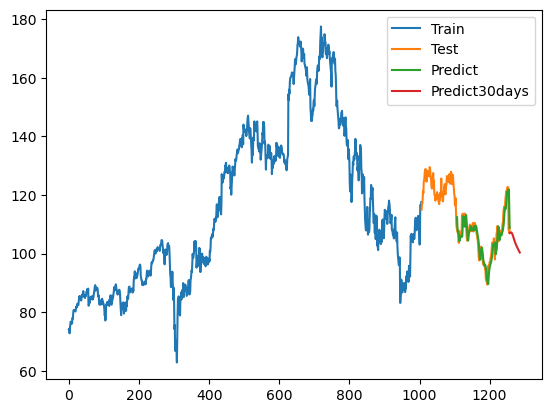

In [33]:
#Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=len(df1), step=1)
plt.plot(test_data_index,(y_pred))
#val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,scaler.inverse_transform(val_data))
#val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [34]:
#train-test (9-1)

In [35]:
# 4. Chia train test 9-1
train_size = int(0.9 * len(df1))
test_size = int(0.1 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]

In [36]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 \n",
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [37]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
#X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [38]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
#X_val = X_val.reshape(X_val.shape[0], time_step, 1)

In [39]:
# Hàm LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [40]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 6s 132ms/step - loss: 0.0764 - val_loss: 0.0140
Epoch 2/100
17/17 [==============================] - 1s 70ms/step - loss: 0.0108 - val_loss: 0.0047
Epoch 3/100
17/17 [==============================] - 1s 71ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 4/100
17/17 [==============================] - 1s 72ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 5/100
17/17 [==============================] - 1s 79ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 6/100
17/17 [==============================] - 1s 80ms/step - loss: 0.0034 - val_loss: 0.0041
Epoch 7/100
17/17 [==============================] - 1s 84ms/step - loss: 0.0032 - val_loss: 0.0046
Epoch 8/100
17/17 [==============================] - 1s 88ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 9/100
17/17 [==============================] - 2s 96ms/step - loss: 0.0028 - val_loss: 0.0041
Epoch 10/100
17/17 [==============================] - 2s 99ms/step - loss: 0.0027 - val_loss: 0.003

In [41]:
# 10. Dự báo dữ liệu test, val
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
#y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 32ms/step


In [42]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
#y_pred_val=scaler.inverse_transform(y_pred_val)

In [43]:
 # 12. Đánh giá độ chính xác thuật toán bằng RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, r2_score, mean_squared_error
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)
# MSE
test_mse = mean_squared_error(y_test, y_pred)
print('Testing MSE:', test_mse)

Testing RMSE: 115.31430236826031
Testing MAPE: 257.34514101818684
Testing MAE: 115.16649700360338
Testing MSE: 13296.903866809873


In [44]:
test_data.shape

(126, 1)

In [45]:
x_input=test_data[26:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[26:].reshape(1,-1)
x_input.shape
        
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
    
from numpy import array
        
lst_output=[]
n_steps=100
i=0
while(i<30):
            
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        n_steps = min(len(temp_input), 100)
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.4091882]
101
1 day input [0.40876998 0.40301632 0.39482171 0.3908988  0.38139661 0.38122223
 0.36832016 0.36622788 0.34922852 0.33702381 0.31339903 0.30363525
 0.31418358 0.32107052 0.33972626 0.34260309 0.33920322 0.3448697
 0.32708571 0.32586525 0.30625056 0.30398396 0.29631247 0.29204084
 0.29055879 0.29979953 0.29169213 0.2851539  0.27739521 0.27233897
 0.25098072 0.24452968 0.24235027 0.23860169 0.23206346 0.23389416
 0.28611285 0.27687211 0.28149244 0.28846658 0.28759483 0.29910211
 0.29709702 0.30354812 0.31252728 0.31775784 0.32351152 0.34208006
 0.35053617 0.35716153 0.35088489 0.34757214 0.34879261 0.36945343
 0.35515651 0.3244704  0.30668647 0.33998784 0.3484439  0.33196756
 0.36858168 0.38584256 0.38749893 0.40589315 0.40615467 0.38531952
 0.37756084 0.36091012 0.37442248 0.39246799 0.39063729 0.37625317
 0.37939153 0.38139661 0.39333973 0.3908988  0.39368845 0.40057539
 0.41469798 0.41382617 0.44180983 0.45636828 0.45863488 0.4647372
 0.45340424 0.4629937  0.48653129 0.

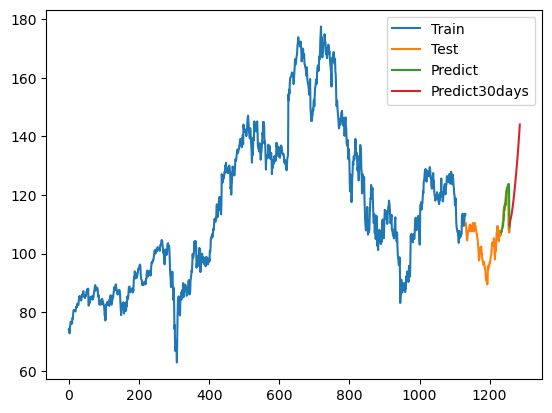

In [47]:
#Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=len(df1), step=1)
plt.plot(test_data_index,(y_pred))
#val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,scaler.inverse_transform(val_data))
#val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()